<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-de-pacotes" data-toc-modified-id="Import-de-pacotes-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import de pacotes</a></span></li><li><span><a href="#Definição-de-parâmetros-gerais" data-toc-modified-id="Definição-de-parâmetros-gerais-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Definição de parâmetros gerais</a></span></li><li><span><a href="#Leitura-do-dado-inicial" data-toc-modified-id="Leitura-do-dado-inicial-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Leitura do dado inicial</a></span></li><li><span><a href="#Gerar-discretização" data-toc-modified-id="Gerar-discretização-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Gerar discretização</a></span></li><li><span><a href="#Adicionar-regressores" data-toc-modified-id="Adicionar-regressores-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Adicionar regressores</a></span><ul class="toc-item"><li><span><a href="#Uso-de-solo" data-toc-modified-id="Uso-de-solo-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Uso de solo</a></span></li><li><span><a href="#População" data-toc-modified-id="População-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>População</a></span></li></ul></li><li><span><a href="#Salvar-resultado" data-toc-modified-id="Salvar-resultado-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Salvar resultado</a></span></li></ul></div>

Pipeline de leitura e tratamento completo dos dados do projeto

# Import de pacotes

In [18]:
import os,sys
import glob
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

import DiscretizationBox

# Definição de parâmetros gerais

In [2]:
DATA_PATH = r'C:\Users\Elogroup\GiovanniAmorim\Personal\ProjetoAmbulancias\dados'

ENTR_DATA_PATH = os.path.join(DATA_PATH,'1_entrada')
TRTD_DATA_PATH = os.path.join(DATA_PATH,'2_tratados')

# Leitura do dado inicial

In [37]:
init_discretization_file = glob.glob(os.path.join(ENTR_DATA_PATH,'discretizacao_inicial','*.shp'))[0]
df = gpd.read_file(init_discretization_file)

# Gerar discretização

In [38]:
# df = DiscretizationBox.generate_discretization(df, shape='rectangles', nx=20, ny=20, neighborhood_type='8')
df = DiscretizationBox.generate_discretization(df, shape='hexagons', h3_discretization_level=6)

In [ ]:
df.reset_index(inplace=True)

# Adicionar regressores

## Uso de solo

In [39]:
soil_use_df = gpd.read_file(os.path.join(ENTR_DATA_PATH,'regressores','uso de solo','uso do solo.shp'))

In [40]:
soil_use_df = soil_use_df.set_crs(df.crs)

In [41]:
df = DiscretizationBox.addRegressorUniformDistribution(df,soil_use_df,discr_id_col='index')

## População

In [43]:
population_df = gpd.read_file(os.path.join(ENTR_DATA_PATH,'regressores','populacao','populacao.shp'))

In [44]:
df = DiscretizationBox.addRegressorUniformDistribution(df,population_df,discr_id_col='index')

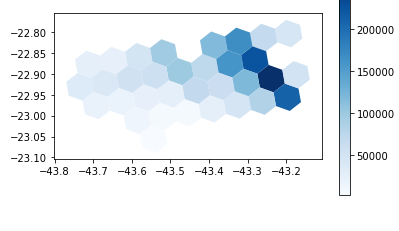

In [45]:
fig, ax = plt.subplots(1, 1)
df.plot(column='populaca_1',ax=ax,legend=True,cmap='Blues')
fig.show()

# Salvar resultado

In [52]:
DiscretizationBox.save_gdf(df,os.path.join(TRTD_DATA_PATH,'discret_hex_6'))